In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from packages import general, bh, fmm

In [2]:
np.random.seed(0)

num_particles = 1000

theta = 0.5

terms_vals = np.arange(2, 10, dtype=int)

particles = [general.Particle() for _ in range(num_particles)]

pair_method = general.Pairwise(particles)
bh_methods = [bh.BH(particles, theta, terms) for terms in terms_vals]
fmm_methods = [fmm.FMM(particles, terms) for terms in terms_vals]

In [3]:
pair_method.do_method()
pair_pot = np.array([p.potential for p in particles])
pair_force = np.array([p.force_per for p in particles])

bh_pots = []
bh_forces = []
fmm_pots = []
fmm_forces = []

for b in bh_methods:
    b.do_method()
    bh_pots.append(np.array([p.potential for p in particles]))
    bh_forces.append(np.array([p.force_per for p in particles]))
for f in fmm_methods:
    f.do_method()
    fmm_pots.append(np.array([p.potential for p in particles]))
    fmm_forces.append(np.array([p.force_per for p in particles]))

In [4]:
# fractional errors in potentials
bh_pots_fracs = [abs((pot - pair_pot) / pair_pot) for pot in bh_pots]
fmm_pots_fracs = [abs((pot - pair_pot) / pair_pot) for pot in fmm_pots]

# magnitudes and angles of forces
pair_force_mag     = np.linalg.norm(pair_force, axis=1)
pair_force_angle   = np.arctan2(pair_force[:,1], pair_force[:,0])
bh_forces_mag = [np.linalg.norm(force, axis=1) for force in bh_forces]
bh_forces_angle = [np.arctan2(force[:,1], force[:,0]) for force in bh_forces]
fmm_forces_mag = [np.linalg.norm(force, axis=1) for force in fmm_forces]
fmm_forces_angle = [np.arctan2(force[:,1], force[:,0]) for force in fmm_forces]

# fractional errors in force magnitudes
bh_forces_mag_frac = [abs((force_mag - pair_force_mag) / pair_force_mag) for force_mag in bh_forces_mag]
fmm_forces_mag_frac = [abs((force_mag - pair_force_mag) / pair_force_mag) for force_mag in fmm_forces_mag]

# fractional errors in forces angles
# smallest angluar difference between over 2pi
bh_forces_angle_frac = []
for force_angle in bh_forces_angle:
    delta = abs(force_angle - pair_force_angle) % (2*np.pi)
    bh_forces_angle_frac.append(np.minimum(delta, 2*np.pi - delta) / 2*np.pi)
fmm_forces_angle_frac = []
for force_angle in fmm_forces_angle:
    delta = abs(force_angle - pair_force_angle) % (2*np.pi)
    fmm_forces_angle_frac.append(np.minimum(delta, 2*np.pi - delta) / 2*np.pi)

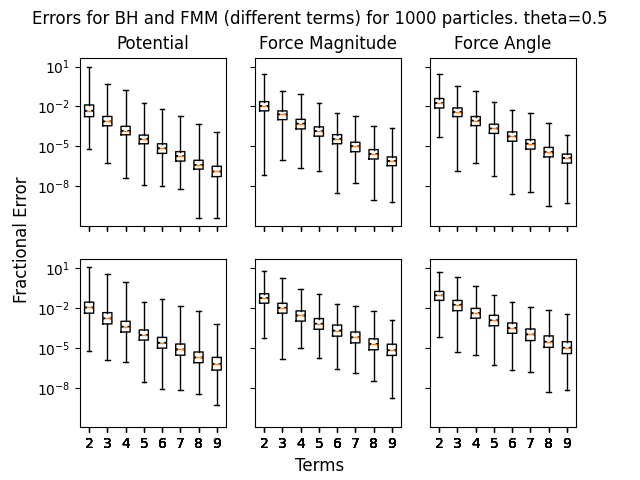

In [7]:
# bh
data_bh_pots = bh_pots_fracs
data_bh_mag = bh_forces_mag_frac
data_bh_angle = bh_forces_angle_frac

# fmm
data_fmm_pots = fmm_pots_fracs
data_fmm_mag = fmm_forces_mag_frac
data_fmm_angle = fmm_forces_angle_frac

fig, axs = plt.subplots(2, 3, sharex='all', sharey='all')
(bh_ax1, bh_ax2, bh_ax3), (fmm_ax1, fmm_ax2, fmm_ax3) = axs

x_labels = terms_vals

FILE_PATH = 'error_data/terms.npz'
np.savez(FILE_PATH, 
    data_bh_pots=data_bh_pots,
    data_bh_mag=data_bh_mag,
    data_bh_angle=data_bh_angle,
    data_fmm_pots=data_fmm_pots,
    data_fmm_mag=data_fmm_mag,
    data_fmm_angle=data_fmm_angle,
    x_labels=x_labels
)

fig.suptitle(f'Errors for BH and FMM (different terms) for {num_particles} particles. theta={theta}')
fig.supxlabel('Terms')
fig.supylabel('Fractional Error')

bh_ax1.boxplot(data_bh_pots,  notch=True, whis=(0,100))
bh_ax2.boxplot(data_bh_mag,   notch=True, whis=(0,100))
bh_ax3.boxplot(data_bh_angle, notch=True, whis=(0,100))
fmm_ax1.boxplot(data_fmm_pots,  notch=True, whis=(0,100))
fmm_ax2.boxplot(data_fmm_mag,   notch=True, whis=(0,100))
fmm_ax3.boxplot(data_fmm_angle, notch=True, whis=(0,100))

full_x_labels = list(x_labels)*6

bh_ax1.set_yscale('log')
bh_ax1.set_xticklabels(full_x_labels)
bh_ax1.set_title('Potential')
bh_ax2.set_title('Force Magnitude')
bh_ax3.set_title('Force Angle');

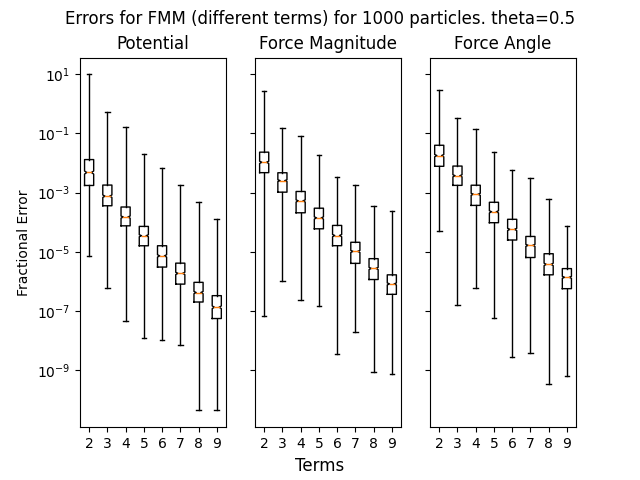

In [8]:
# plot bh

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all')

ax1.boxplot(data_bh_pots,  notch=True, whis=(0,100))
ax2.boxplot(data_bh_mag,   notch=True, whis=(0,100))
ax3.boxplot(data_bh_angle, notch=True, whis=(0,100))

fig.suptitle(f'Errors for FMM (different terms) for {num_particles} particles. theta={theta}')
fig.supxlabel('Terms')

ax1.set_yscale('log')
ax1.set_ylabel('Fractional Error')
ax1.set_xticklabels(x_labels)
ax2.set_xticklabels(x_labels)
ax3.set_xticklabels(x_labels)
ax1.set_title('Potential')
ax2.set_title('Force Magnitude')
ax3.set_title('Force Angle');

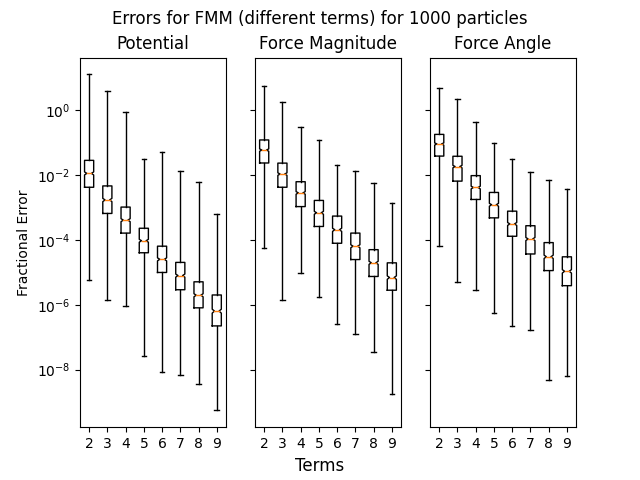

In [9]:
# plot fmm

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all')

ax1.boxplot(data_fmm_pots,  notch=True, whis=(0,100))
ax2.boxplot(data_fmm_mag,   notch=True, whis=(0,100))
ax3.boxplot(data_fmm_angle, notch=True, whis=(0,100))

fig.suptitle(f'Errors for FMM (different terms) for {num_particles} particles')
fig.supxlabel('Terms')

ax1.set_yscale('log')
ax1.set_ylabel('Fractional Error')
ax1.set_xticklabels(x_labels)
ax2.set_xticklabels(x_labels)
ax3.set_xticklabels(x_labels)
ax1.set_title('Potential')
ax2.set_title('Force Magnitude')
ax3.set_title('Force Angle');